In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

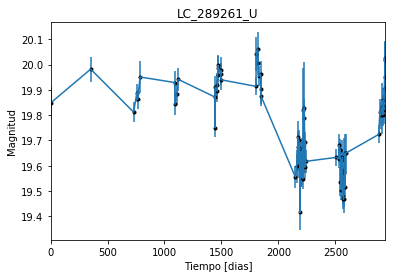

In [2]:
data = np.genfromtxt('LC_289261_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_289261_U')
plt.savefig("LC_289261_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

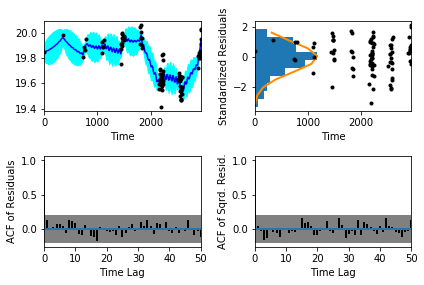

In [5]:
sample.assess_fit()

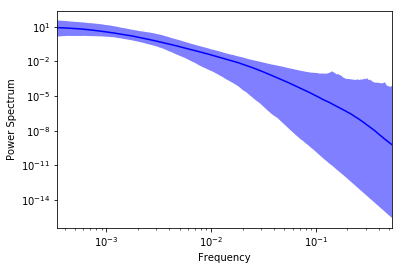

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

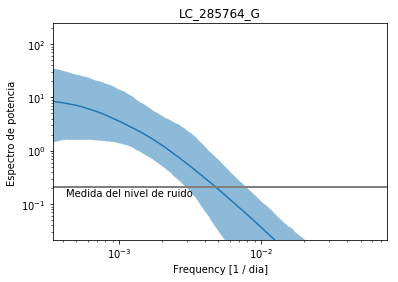

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_G')

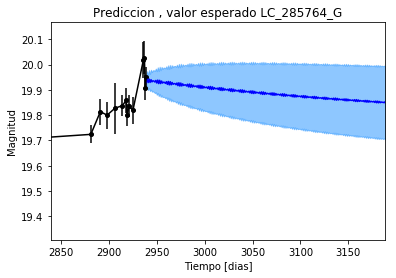

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_G')

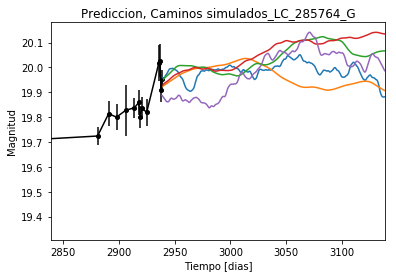

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


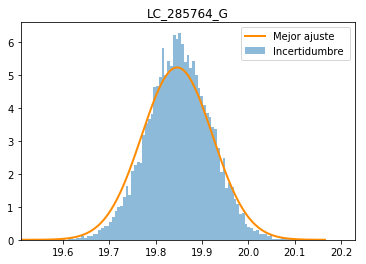

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_G')
plt.savefig("Mejor_ajuste_LC_285764_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_G')

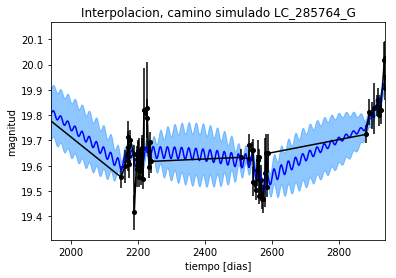

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_G')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_G')

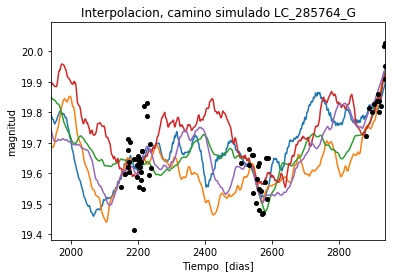

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 584.003443188
Median: 0.0187381683302
Standard deviation: 0.217979625554
68% credibility interval: [ 0.00166331  0.23188079]
95% credibility interval: [  4.41166271e-04   8.62802755e-01]
99% credibility interval: [  3.62905160e-04   1.04278948e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 658.37120327
Median: 0.00613421255416
Standard deviation: 0.111234743383
68% credibility interval: [ 0.00074945  0.05137508]
95% credibility interval: [  3.88508944e-04   3.93941119e-01]
99% credibility interval: [  3.49240823e-04   7.63592262e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 330.775016959
Median: 0.0389091577217
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1021.96530015
Median: 163.598557455
Standard deviation: 1.73896053231
68% credibility interval: [ 161.67291007  164.86758947]
95% credibility interval: [ 159.17170166  165.93927071]
99% credibility interval: [ 156.95287473  167.06924326]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 396.975883544
Median: 0.940189421664
Standard deviation: 2.40309715366
68% credibility interval: [ 0.12707624  4.29436282]
95% credibility interval: [ 0.02570456  8.47277981]
99% credibility interval: [  0.01392971  11.41407184]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 675.316664061
Median: 1.59761525873
Standard deviation: 10.8632853295
68% credibility interval: [  0.09374653  14.26358644]
95% credibility interval: [  6.02576117

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0826681
Median: 9.10284642556e-31
Standard deviation: 1.78430251519e+125
68% credibility interval: [  2.56008217e-67   3.79842765e-04]
95% credibility interval: [  4.72868829e-138   2.24529635e+031]
99% credibility interval: [  1.29071568e-163   1.01222904e+075]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2076.30026942
Median: 19.8256315473
Standard deviation: 0.0712389946589
68% credibility interval: [ 19.7683944   19.89302459]
95% credibility interval: [ 19.69705836  19.98204366]
99% credibility interval: [ 19.63362224  20.05473223]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 295.66611585
Median: 0.077594340261
Standard deviation: 0.275482198643
68% credibility interval: [ 0.          0.52333177]
95% credibility interval: [ 0.          0.93932413]
99% credibility interval: [ 0.          1.05092935]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 295.66611585
Median: 0.077594340261
Standard deviation: 0.275482198643
68% credibility interval: [ 0.          0.52333177]
95% credibility interval: [ 0.          0.93932413]
99% credibility interval: [ 0.          1.05092935]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 984.315361227
Median: 0.0
Standard deviation: 0.000568264687168
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1021.96530015
Median: 163.598557455
Standard deviation: 1.73896053231
68% credibility interval: [ 161.67291007  164.86758947]
95% credibility interval: [ 159.17170166  165.93927071]
99% credibility interval: [ 156.95287473  167.06924326]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3235.80368635
Median: 0.0249534897401
Standard deviation: 0.0237234030112
68% credibility interval: [ 0.01576457  0.04250191]
95% credibility interval: [ 0.01093544  0.08041772]
99% credibility interval: [ 0.00881766  0.14655748]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 899.640197222
Median: 1.21811266197
Standard deviation: 0.176875255589
68% credibility interval: [ 1.06212754  1.40317597]
95% credibility interval: [ 0.92050578  1.62319589]
99% credibility interval: [ 0.82897773  1.76969097]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 881.590081163
Median: 0.00187944261981
Standard deviation: 0.294724237649
68% credibility interval: [  1.65837737e-05   5.73682857e-02]
95% credibility interval: [  8.46758803e-36   5.33797479e-01]
99% credibility interval: [  5.84212908e-78   1.97483080e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 584.003443188
Median: (-0.117735383936-1.09721174125j)
Standard deviation: 2.20722816899
68% credibility interval: [-1.45695000-3.02363778j -0.01045089+0.j        ]
95% credibility interval: [ -5.42114959e+00+0.j          -2.77192943e-03-0.00137018j]
99% credibility interval: [ -6.55203954e+00+0.j         -2.28020037e-03-1.0580624j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 658.37120327
Median: (-0.0385423941914+1.34870946791j)
Standard deviation: 1.86668359694
68% credibility interval: [-0.32279913+0.52600251j -0.00470895+0.j        ]
95% credibility interval: [ -2.47520505e+00+3.51293213j  -2.44107369e-03+0.00482748j]
99% credibility interval: [ -4.79779168e+00+0.j  -2.19434481e-03+0.j]
Posterior summary for pa